In [ ]:
!pip install GPopt nnetsauce

In [ ]:
import GPopt as gp
import nnetsauce as ns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize
from statsmodels.nonparametric.smoothers_lowess import lowess


# Six-Hump Camel Function (Objective function, to be minimized)
def six_hump_camel(x):
    """
    Six-Hump Camel Function:
    - Global minima located at:
      (0.0898, -0.7126),
      (-0.0898, 0.7126)
    - Function value at the minima: f(x) = -1.0316
    """
    x1 = x[0]
    x2 = x[1]
    term1 = (4 - 2.1 * x1**2 + (x1**4) / 3) * x1**2
    term2 = x1 * x2
    term3 = (-4 + 4 * x2**2) * x2**2
    return term1 + term2 + term3

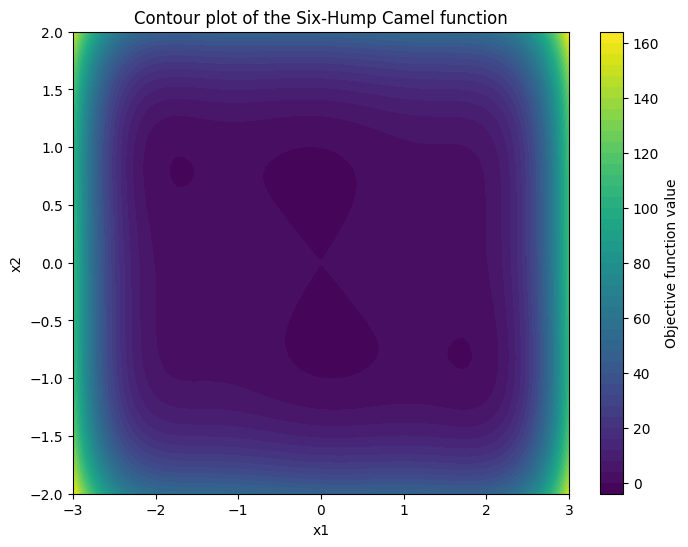

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Generate a grid of points in the input space
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the objective function at each point in the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = six_hump_camel([X[i, j], Y[i, j]])

# Plot the contour map
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Objective function value')
plt.title('Contour plot of the Six-Hump Camel function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
from sklearn.utils import all_estimators
from tqdm import tqdm

# Get all available scikit-learn estimators
estimators = all_estimators(type_filter='regressor')

results = []

# Loop through all regressors
for name, RegressorClass in tqdm(estimators):
    try:
        # Instantiate the regressor (you might need to handle potential exceptions or required parameters)
        regressor = RegressorClass()
        print(f"\n Successfully instantiated regressor: {name} ----------")
        # GPopt for Bayesian optimization
        gp_opt = gp.GPOpt(objective_func=six_hump_camel,
                          lower_bound = np.array([-3, -2]),
                          upper_bound = np.array([3, 2]),
                          acquisition="ucb",
                          method="splitconformal",
                          surrogate_obj=ns.PredictionInterval(regressor), # Any surrogate model can be used, thanks to nnetsauce
                          n_init=10,
                          n_iter=190,
                          seed=432)
        print(f"gp_opt.method: {gp_opt.method}")
        res = gp_opt.optimize(verbose=1, ucb_tol=1e-6)
        print(f"\n\n result: {res}")
        display(res.best_params)
        display(res.best_score)
        results.append((name, res))

    except Exception as e:
        print(f"Could not instantiate regressor {name}: {e}")


  0%|          | 0/55 [00:00<?, ?it/s]


 Successfully instantiated regressor: ARDRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 8ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

  2%|▏         | 1/55 [00:02<02:30,  2.79s/it]


 Successfully instantiated regressor: AdaBoostRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 63s 332ms/step


 result: DescribeResult(best_params=array([ 0.09375, -0.8125 ]), best_score=np.float64(-0.938577521033585))


array([ 0.09375, -0.8125 ])

np.float64(-0.938577521033585)

  4%|▎         | 2/55 [01:06<34:22, 38.91s/it]


 Successfully instantiated regressor: BaggingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 14s 74ms/step


 result: DescribeResult(best_params=array([ 0.09649658, -0.71691895]), best_score=np.float64(-1.0313347256499197))


array([ 0.09649658, -0.71691895])

np.float64(-1.0313347256499197)

  5%|▌         | 3/55 [01:21<24:10, 27.90s/it]


 Successfully instantiated regressor: BayesianRidge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

  7%|▋         | 4/55 [01:23<14:56, 17.57s/it]


 Successfully instantiated regressor: CCA ----------


  9%|▉         | 5/55 [01:24<09:35, 11.50s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor CCA: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.

 Successfully instantiated regressor: DecisionTreeRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([ 0.08203125, -0.6640625 ]), best_score=np.float64(-1.0137184499462486))


array([ 0.08203125, -0.6640625 ])

np.float64(-1.0137184499462486)

 11%|█         | 6/55 [01:26<06:52,  8.43s/it]


 Successfully instantiated regressor: DummyRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 13%|█▎        | 7/55 [01:28<05:00,  6.26s/it]


 Successfully instantiated regressor: ElasticNet ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 15%|█▍        | 8/55 [01:30<03:52,  4.95s/it]


 Successfully instantiated regressor: ElasticNetCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 13s 68ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 16%|█▋        | 9/55 [01:44<05:54,  7.72s/it]


 Successfully instantiated regressor: ExtraTreeRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 8ms/step


 result: DescribeResult(best_params=array([ 0.08203125, -0.6640625 ]), best_score=np.float64(-1.0137184499462486))


array([ 0.08203125, -0.6640625 ])

np.float64(-1.0137184499462486)

 18%|█▊        | 10/55 [01:46<04:30,  6.02s/it]


 Successfully instantiated regressor: ExtraTreesRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 94s 492ms/step


 result: DescribeResult(best_params=array([-0.05877686, -0.66418457]), best_score=np.float64(-0.9333100344965217))


array([-0.05877686, -0.66418457])

np.float64(-0.9333100344965217)

 20%|██        | 11/55 [03:21<24:16, 33.10s/it]


 Successfully instantiated regressor: GammaRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

  9/190 [█.............................] - ETA: 6s

 22%|██▏       | 12/55 [03:22<16:53, 23.56s/it]

Could not instantiate regressor GammaRegressor: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.

 Successfully instantiated regressor: GaussianProcessRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 54s 282ms/step


 result: DescribeResult(best_params=array([ 0.09649658, -0.71691895]), best_score=np.float64(-1.0313347256499197))


array([ 0.09649658, -0.71691895])

np.float64(-1.0313347256499197)

 24%|██▎       | 13/55 [04:17<23:08, 33.05s/it]


 Successfully instantiated regressor: GradientBoostingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 32s 171ms/step


 result: DescribeResult(best_params=array([ 0.04907227, -0.71142578]), best_score=np.float64(-1.025140955917896))


array([ 0.04907227, -0.71142578])

np.float64(-1.025140955917896)

 25%|██▌       | 14/55 [04:51<22:39, 33.15s/it]


 Successfully instantiated regressor: HistGradientBoostingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 62s 324ms/step


 result: DescribeResult(best_params=array([-0.00732422, -0.72167969]), best_score=np.float64(-0.9927655380892927))


array([-0.00732422, -0.72167969])

np.float64(-0.9927655380892927)

 27%|██▋       | 15/55 [05:54<28:03, 42.09s/it]


 Successfully instantiated regressor: HuberRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 3s 18ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 29%|██▉       | 16/55 [05:58<20:02, 30.82s/it]


 Successfully instantiated regressor: IsotonicRegression ----------


 31%|███       | 17/55 [05:59<13:48, 21.79s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor IsotonicRegression: Isotonic regression input X should be a 1d array or 2d array with 1 feature

 Successfully instantiated regressor: KNeighborsRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 18s 97ms/step


 result: DescribeResult(best_params=array([ 0.08203125, -0.6640625 ]), best_score=np.float64(-1.0137184499462486))


array([ 0.08203125, -0.6640625 ])

np.float64(-1.0137184499462486)

 33%|███▎      | 18/55 [06:18<12:57, 21.00s/it]


 Successfully instantiated regressor: KernelRidge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 8s 44ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 35%|███▍      | 19/55 [06:27<10:26, 17.40s/it]


 Successfully instantiated regressor: Lars ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 36%|███▋      | 20/55 [06:29<07:23, 12.68s/it]


 Successfully instantiated regressor: LarsCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 38%|███▊      | 21/55 [06:31<05:26,  9.61s/it]


 Successfully instantiated regressor: Lasso ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 40%|████      | 22/55 [06:33<03:58,  7.24s/it]


 Successfully instantiated regressor: LassoCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 13s 70ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 42%|████▏     | 23/55 [06:48<05:03,  9.50s/it]


 Successfully instantiated regressor: LassoLars ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 44%|████▎     | 24/55 [06:49<03:42,  7.17s/it]


 Successfully instantiated regressor: LassoLarsCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 45%|████▌     | 25/55 [06:52<02:52,  5.76s/it]


 Successfully instantiated regressor: LassoLarsIC ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 47%|████▋     | 26/55 [06:54<02:12,  4.57s/it]


 Successfully instantiated regressor: LinearRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 49%|████▉     | 27/55 [06:55<01:42,  3.67s/it]


 Successfully instantiated regressor: LinearSVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 51%|█████     | 28/55 [06:57<01:21,  3.03s/it]


 Successfully instantiated regressor: MLPRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 38s 202ms/step


 result: DescribeResult(best_params=array([-0.09155273,  0.69482422]), best_score=np.float64(-1.0290467685241445))


array([-0.09155273,  0.69482422])

np.float64(-1.0290467685241445)

 53%|█████▎    | 29/55 [07:36<06:00, 13.88s/it]

Could not instantiate regressor MultiOutputRegressor: MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'

 Successfully instantiated regressor: MultiTaskElasticNet ----------


 56%|█████▋    | 31/55 [07:37<03:03,  7.65s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskElasticNet: For mono-task outputs, use ElasticNet

 Successfully instantiated regressor: MultiTaskElasticNetCV ----------


 58%|█████▊    | 32/55 [07:38<02:18,  6.03s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskElasticNetCV: For mono-task outputs, use ElasticNetCVCV

 Successfully instantiated regressor: MultiTaskLasso ----------


 60%|██████    | 33/55 [07:39<01:45,  4.80s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskLasso: For mono-task outputs, use ElasticNet

 Successfully instantiated regressor: MultiTaskLassoCV ----------


 62%|██████▏   | 34/55 [07:40<01:19,  3.77s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskLassoCV: For mono-task outputs, use LassoCVCV

 Successfully instantiated regressor: NuSVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 29s 155ms/step


 result: DescribeResult(best_params=array([ 0.09649658, -0.71691895]), best_score=np.float64(-1.0313347256499197))


array([ 0.09649658, -0.71691895])

np.float64(-1.0313347256499197)

 64%|██████▎   | 35/55 [08:10<03:43, 11.16s/it]


 Successfully instantiated regressor: OrthogonalMatchingPursuit ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 65%|██████▌   | 36/55 [08:12<02:39,  8.42s/it]


 Successfully instantiated regressor: OrthogonalMatchingPursuitCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 7ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 67%|██████▋   | 37/55 [08:14<01:58,  6.59s/it]


 Successfully instantiated regressor: PLSCanonical ----------


 69%|██████▉   | 38/55 [08:15<01:22,  4.87s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor PLSCanonical: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.

 Successfully instantiated regressor: PLSRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 7ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 71%|███████   | 39/55 [08:17<01:06,  4.16s/it]


 Successfully instantiated regressor: PassiveAggressiveRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 73%|███████▎  | 40/55 [08:19<00:51,  3.45s/it]


 Successfully instantiated regressor: PoissonRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

  6/190 [..............................] - ETA: 2s

 75%|███████▍  | 41/55 [08:20<00:37,  2.69s/it]

Could not instantiate regressor PoissonRegressor: Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.

 Successfully instantiated regressor: QuantileRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 10ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 76%|███████▋  | 42/55 [08:23<00:35,  2.69s/it]


 Successfully instantiated regressor: RANSACRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 8s 43ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 78%|███████▊  | 43/55 [08:32<00:54,  4.56s/it]


 Successfully instantiated regressor: RadiusNeighborsRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 429s 2s/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 80%|████████  | 44/55 [15:42<24:11, 131.93s/it]


 Successfully instantiated regressor: RandomForestRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 97s 508ms/step


 result: DescribeResult(best_params=array([ 0.08203125, -0.6640625 ]), best_score=np.float64(-1.0137184499462486))


array([ 0.08203125, -0.6640625 ])

np.float64(-1.0137184499462486)

 82%|████████▏ | 45/55 [17:20<20:18, 121.80s/it]

Could not instantiate regressor RegressorChain: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'

 Successfully instantiated regressor: Ridge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 85%|████████▌ | 47/55 [17:22<08:48, 66.03s/it] 


 Successfully instantiated regressor: RidgeCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 7ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 87%|████████▋ | 48/55 [17:24<05:52, 50.34s/it]


 Successfully instantiated regressor: SGDRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 89%|████████▉ | 49/55 [17:26<03:45, 37.61s/it]


 Successfully instantiated regressor: SVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 38s 201ms/step


 result: DescribeResult(best_params=array([ 0.09649658, -0.71691895]), best_score=np.float64(-1.0313347256499197))


array([ 0.09649658, -0.71691895])

np.float64(-1.0313347256499197)

 91%|█████████ | 50/55 [18:05<03:09, 37.96s/it]

Could not instantiate regressor StackingRegressor: StackingRegressor.__init__() missing 1 required positional argument: 'estimators'

 Successfully instantiated regressor: TheilSenRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 51s 269ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 95%|█████████▍| 52/55 [18:57<01:38, 32.71s/it]


 Successfully instantiated regressor: TransformedTargetRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

 96%|█████████▋| 53/55 [18:59<00:50, 25.36s/it]


 Successfully instantiated regressor: TweedieRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 8ms/step


 result: DescribeResult(best_params=array([-0.06650758, -0.66453519]), best_score=np.float64(-0.9245124394795201))


array([-0.06650758, -0.66453519])

np.float64(-0.9245124394795201)

100%|██████████| 55/55 [19:01<00:00, 20.75s/it]

Could not instantiate regressor VotingRegressor: VotingRegressor.__init__() missing 1 required positional argument: 'estimators'


In [19]:
import pandas as pd

results_df = pd.DataFrame(columns=['Regressor', 'Best Params', 'Best Score'])

for name, res in results:
    best_params = res.best_params
    best_score = res.best_score
    results_df = pd.concat([results_df, pd.DataFrame({'Regressor': [name], 'Best Params': [best_params], 'Best Score': [best_score]})], ignore_index=True)

results_df.sort_values(by='Best Score', ascending=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df.style.format({'Best Score': "{:.5f}"})

,Regressor,Best Params,Best Score
0,BaggingRegressor,[ 0.09649658 -0.71691895],-1.03133
1,GaussianProcessRegressor,[ 0.09649658 -0.71691895],-1.03133
2,NuSVR,[ 0.09649658 -0.71691895],-1.03133
3,SVR,[ 0.09649658 -0.71691895],-1.03133
4,MLPRegressor,[-0.09155273 0.69482422],-1.02905
5,GradientBoostingRegressor,[ 0.04907227 -0.71142578],-1.02514
6,KNeighborsRegressor,[ 0.08203125 -0.6640625 ],-1.01372
7,ExtraTreeRegressor,[ 0.08203125 -0.6640625 ],-1.01372
8,RandomForestRegressor,[ 0.08203125 -0.6640625 ],-1.01372
9,DecisionTreeRegressor,[ 0.08203125 -0.6640625 ],-1.01372


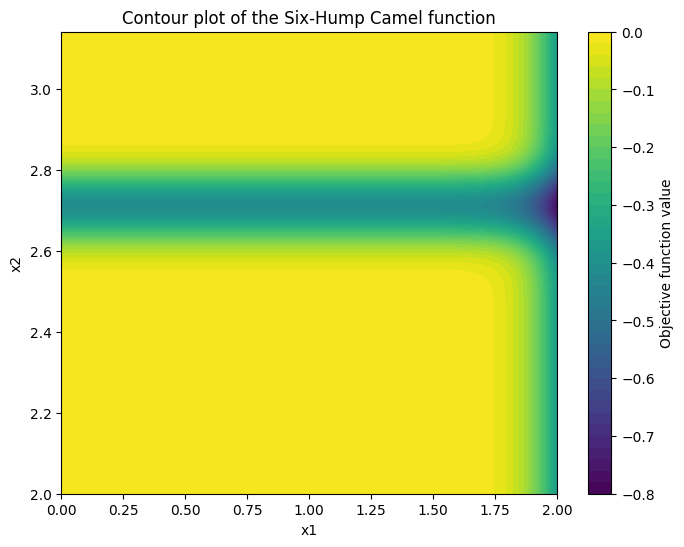

In [20]:
# Michalewicz Function
def michalewicz(x, m=10):
    """
    Michalewicz Function (for n=2 dimensions):
    """
    return -sum(np.sin(xi) * (np.sin((i + 1) * xi**2 / np.pi))**(2 * m) for i, xi in enumerate(x))


import matplotlib.pyplot as plt
import numpy as np
# Generate a grid of points in the input space
x = np.linspace(0, 2, 100)
y = np.linspace(np.pi, 2, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the objective function at each point in the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = michalewicz([X[i, j], Y[i, j]])

# Plot the contour map
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Objective function value')
plt.title('Contour plot of the Six-Hump Camel function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [21]:
from sklearn.utils import all_estimators
from tqdm import tqdm

# Get all available scikit-learn estimators
estimators = all_estimators(type_filter='regressor')

results = []

# Loop through all regressors
for name, RegressorClass in tqdm(estimators):
    try:
        # Instantiate the regressor (you might need to handle potential exceptions or required parameters)
        regressor = RegressorClass()
        print(f"\n Successfully instantiated regressor: {name} ----------")
        # GPopt for Bayesian optimization
        gp_opt = gp.GPOpt(objective_func=michalewicz,
                          lower_bound = np.array([0, np.pi]),
                          upper_bound = np.array([2, 2]),
                          acquisition="ucb",
                          method="splitconformal",
                          surrogate_obj=ns.PredictionInterval(regressor), # Any surrogate model can be used, thanks to nnetsauce
                          n_init=10,
                          n_iter=190,
                          seed=432)
        print(f"gp_opt.method: {gp_opt.method}")
        res = gp_opt.optimize(verbose=1, ucb_tol=1e-6)
        print(f"\n\n result: {res}")
        display(res.best_params)
        display(res.best_score)
        results.append((name, res))

    except Exception as e:
        print(f"Could not instantiate regressor {name}: {e}")


  0%|          | 0/55 [00:00<?, ?it/s]


 Successfully instantiated regressor: ARDRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

  2%|▏         | 1/55 [00:01<01:41,  1.87s/it]


 Successfully instantiated regressor: AdaBoostRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 72s 377ms/step


 result: DescribeResult(best_params=array([1.99511719, 2.70736381]), best_score=np.float64(-0.7688210286827822))


array([1.99511719, 2.70736381])

np.float64(-0.7688210286827822)

  4%|▎         | 2/55 [01:14<38:32, 43.63s/it]


 Successfully instantiated regressor: BaggingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 15s 77ms/step


 result: DescribeResult(best_params=array([1.9989624 , 2.71631734]), best_score=np.float64(-0.7789474692145566))


array([1.9989624 , 2.71631734])

np.float64(-0.7789474692145566)

  5%|▌         | 3/55 [01:30<26:39, 30.76s/it]


 Successfully instantiated regressor: BayesianRidge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

  7%|▋         | 4/55 [01:32<16:27, 19.36s/it]


 Successfully instantiated regressor: CCA ----------


  9%|▉         | 5/55 [01:33<10:44, 12.90s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor CCA: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.

 Successfully instantiated regressor: DecisionTreeRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([1.8515625 , 2.73579214]), best_score=np.float64(-0.4717777803180189))


array([1.8515625 , 2.73579214])

np.float64(-0.4717777803180189)

 11%|█         | 6/55 [01:36<07:48,  9.56s/it]


 Successfully instantiated regressor: DummyRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 0s 802us/step


 result: DescribeResult(best_params=array([0.75      , 2.71349541]), best_score=np.float64(-0.412569958033816))


array([0.75      , 2.71349541])

np.float64(-0.412569958033816)

 13%|█▎        | 7/55 [01:37<05:24,  6.77s/it]


 Successfully instantiated regressor: ElasticNet ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 0s 1ms/step


 result: DescribeResult(best_params=array([0.75      , 2.71349541]), best_score=np.float64(-0.412569958033816))


array([0.75      , 2.71349541])

np.float64(-0.412569958033816)

 15%|█▍        | 8/55 [01:38<03:53,  4.96s/it]


 Successfully instantiated regressor: ElasticNetCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 15s 77ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 16%|█▋        | 9/55 [01:54<06:18,  8.23s/it]


 Successfully instantiated regressor: ExtraTreeRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([1.9453125 , 2.68227998]), best_score=np.float64(-0.6080361622438152))


array([1.9453125 , 2.68227998])

np.float64(-0.6080361622438152)

 18%|█▊        | 10/55 [01:56<04:50,  6.45s/it]


 Successfully instantiated regressor: ExtraTreesRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 99s 521ms/step


 result: DescribeResult(best_params=array([1.97668457, 2.67872644]), best_score=np.float64(-0.6714333171001994))


array([1.97668457, 2.67872644])

np.float64(-0.6714333171001994)

 20%|██        | 11/55 [03:36<25:46, 35.15s/it]


 Successfully instantiated regressor: GammaRegressor ----------


 22%|██▏       | 12/55 [03:37<17:41, 24.68s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor GammaRegressor: Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.

 Successfully instantiated regressor: GaussianProcessRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 57s 301ms/step


 result: DescribeResult(best_params=array([1.9989624 , 2.71631734]), best_score=np.float64(-0.7789474692145566))


array([1.9989624 , 2.71631734])

np.float64(-0.7789474692145566)

 24%|██▎       | 13/55 [04:35<24:22, 34.81s/it]


 Successfully instantiated regressor: GradientBoostingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 35s 187ms/step


 result: DescribeResult(best_params=array([1.9989624 , 2.71631734]), best_score=np.float64(-0.7789474692145566))


array([1.9989624 , 2.71631734])

np.float64(-0.7789474692145566)

 25%|██▌       | 14/55 [05:11<24:06, 35.27s/it]


 Successfully instantiated regressor: HistGradientBoostingRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 12ms/step


 result: DescribeResult(best_params=array([0.75      , 2.71349541]), best_score=np.float64(-0.412569958033816))


array([0.75      , 2.71349541])

np.float64(-0.412569958033816)

 27%|██▋       | 15/55 [05:15<17:07, 25.69s/it]


 Successfully instantiated regressor: HuberRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 3s 17ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 29%|██▉       | 16/55 [05:19<12:27, 19.17s/it]


 Successfully instantiated regressor: IsotonicRegression ----------


 31%|███       | 17/55 [05:20<08:38, 13.64s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor IsotonicRegression: Isotonic regression input X should be a 1d array or 2d array with 1 feature

 Successfully instantiated regressor: KNeighborsRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 21s 110ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 33%|███▎      | 18/55 [05:42<09:55, 16.10s/it]


 Successfully instantiated regressor: KernelRidge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 9s 47ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 35%|███▍      | 19/55 [05:51<08:30, 14.17s/it]


 Successfully instantiated regressor: Lars ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 36%|███▋      | 20/55 [05:53<06:05, 10.46s/it]


 Successfully instantiated regressor: LarsCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 9ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 38%|███▊      | 21/55 [05:56<04:35,  8.11s/it]


 Successfully instantiated regressor: Lasso ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([0.75      , 2.71349541]), best_score=np.float64(-0.412569958033816))


array([0.75      , 2.71349541])

np.float64(-0.412569958033816)

 40%|████      | 22/55 [05:57<03:23,  6.16s/it]


 Successfully instantiated regressor: LassoCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 15s 77ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 42%|████▏     | 23/55 [06:13<04:48,  9.02s/it]


 Successfully instantiated regressor: LassoLars ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 0s 2ms/step


 result: DescribeResult(best_params=array([0.75      , 2.71349541]), best_score=np.float64(-0.412569958033816))


array([0.75      , 2.71349541])

np.float64(-0.412569958033816)

 44%|████▎     | 24/55 [06:14<03:27,  6.68s/it]


 Successfully instantiated regressor: LassoLarsCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 12ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 45%|████▌     | 25/55 [06:18<02:53,  5.79s/it]


 Successfully instantiated regressor: LassoLarsIC ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 47%|████▋     | 26/55 [06:20<02:15,  4.67s/it]


 Successfully instantiated regressor: LinearRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 49%|████▉     | 27/55 [06:22<01:45,  3.77s/it]


 Successfully instantiated regressor: LinearSVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 51%|█████     | 28/55 [06:24<01:27,  3.23s/it]


 Successfully instantiated regressor: MLPRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 24s 125ms/step


 result: DescribeResult(best_params=array([1.99978638, 2.68494514]), best_score=np.float64(-0.7484106504852366))


array([1.99978638, 2.68494514])

np.float64(-0.7484106504852366)

 53%|█████▎    | 29/55 [06:48<04:12,  9.70s/it]

Could not instantiate regressor MultiOutputRegressor: MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'

 Successfully instantiated regressor: MultiTaskElasticNet ----------


 56%|█████▋    | 31/55 [06:49<02:09,  5.40s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskElasticNet: For mono-task outputs, use ElasticNet

 Successfully instantiated regressor: MultiTaskElasticNetCV ----------


 58%|█████▊    | 32/55 [06:50<01:38,  4.27s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskElasticNetCV: For mono-task outputs, use ElasticNetCVCV

 Successfully instantiated regressor: MultiTaskLasso ----------


 60%|██████    | 33/55 [06:51<01:13,  3.35s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskLasso: For mono-task outputs, use ElasticNet

 Successfully instantiated regressor: MultiTaskLassoCV ----------


 62%|██████▏   | 34/55 [06:52<00:56,  2.68s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor MultiTaskLassoCV: For mono-task outputs, use LassoCVCV

 Successfully instantiated regressor: NuSVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 35s 182ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 64%|██████▎   | 35/55 [07:27<03:56, 11.82s/it]


 Successfully instantiated regressor: OrthogonalMatchingPursuit ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 65%|██████▌   | 36/55 [07:29<02:49,  8.92s/it]


 Successfully instantiated regressor: OrthogonalMatchingPursuitCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 8ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 67%|██████▋   | 37/55 [07:31<02:06,  7.04s/it]


 Successfully instantiated regressor: PLSCanonical ----------


 69%|██████▉   | 38/55 [07:33<01:31,  5.39s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor PLSCanonical: `n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.

 Successfully instantiated regressor: PLSRegression ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 71%|███████   | 39/55 [07:35<01:12,  4.54s/it]


 Successfully instantiated regressor: PassiveAggressiveRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 73%|███████▎  | 40/55 [07:37<00:55,  3.68s/it]


 Successfully instantiated regressor: PoissonRegressor ----------


 75%|███████▍  | 41/55 [07:38<00:39,  2.83s/it]

gp_opt.method: splitconformal

 Creating initial design... 

Could not instantiate regressor PoissonRegressor: Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.

 Successfully instantiated regressor: QuantileRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 2s 12ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 76%|███████▋  | 42/55 [07:41<00:37,  2.90s/it]


 Successfully instantiated regressor: RANSACRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 9s 48ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 78%|███████▊  | 43/55 [07:50<00:59,  5.00s/it]


 Successfully instantiated regressor: RadiusNeighborsRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 462s 2s/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 80%|████████  | 44/55 [15:36<26:08, 142.60s/it]


 Successfully instantiated regressor: RandomForestRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 95s 500ms/step


 result: DescribeResult(best_params=array([1.99978638, 2.68494514]), best_score=np.float64(-0.7484106504852366))


array([1.99978638, 2.68494514])

np.float64(-0.7484106504852366)

 82%|████████▏ | 45/55 [17:12<21:29, 128.92s/it]

Could not instantiate regressor RegressorChain: _BaseChain.__init__() missing 1 required positional argument: 'base_estimator'

 Successfully instantiated regressor: Ridge ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 4ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 85%|████████▌ | 47/55 [17:14<09:19, 69.88s/it] 


 Successfully instantiated regressor: RidgeCV ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 5ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 87%|████████▋ | 48/55 [17:16<06:10, 53.00s/it]


 Successfully instantiated regressor: SGDRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 89%|████████▉ | 49/55 [17:18<03:58, 39.80s/it]


 Successfully instantiated regressor: SVR ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 29s 150ms/step


 result: DescribeResult(best_params=array([0.76176453, 2.71127445]), best_score=np.float64(-0.41275167058825685))


array([0.76176453, 2.71127445])

np.float64(-0.41275167058825685)

 91%|█████████ | 50/55 [17:48<03:05, 37.03s/it]

Could not instantiate regressor StackingRegressor: StackingRegressor.__init__() missing 1 required positional argument: 'estimators'

 Successfully instantiated regressor: TheilSenRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 53s 278ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 95%|█████████▍| 52/55 [18:42<01:37, 32.57s/it]


 Successfully instantiated regressor: TransformedTargetRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 1s 6ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

 96%|█████████▋| 53/55 [18:44<00:50, 25.28s/it]


 Successfully instantiated regressor: TweedieRegressor ----------
gp_opt.method: splitconformal

 Creating initial design... 


 ...Done. 


 Optimization loop... 

190/190 [██████████████████████████████] - 4s 19ms/step


 result: DescribeResult(best_params=array([1.93724655, 2.67858092]), best_score=np.float64(-0.5809231386343184))


array([1.93724655, 2.67858092])

np.float64(-0.5809231386343184)

100%|██████████| 55/55 [18:48<00:00, 20.52s/it]

Could not instantiate regressor VotingRegressor: VotingRegressor.__init__() missing 1 required positional argument: 'estimators'


In [22]:
import pandas as pd

results_df = pd.DataFrame(columns=['Regressor', 'Best Params', 'Best Score'])

for name, res in results:
    best_params = res.best_params
    best_score = res.best_score
    results_df = pd.concat([results_df, pd.DataFrame({'Regressor': [name], 'Best Params': [best_params], 'Best Score': [best_score]})], ignore_index=True)

results_df.sort_values(by='Best Score', ascending=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df.style.format({'Best Score': "{:.5f}"})

,Regressor,Best Params,Best Score
0,BaggingRegressor,[1.9989624 2.71631734],-0.77895
1,GradientBoostingRegressor,[1.9989624 2.71631734],-0.77895
2,GaussianProcessRegressor,[1.9989624 2.71631734],-0.77895
3,AdaBoostRegressor,[1.99511719 2.70736381],-0.76882
4,MLPRegressor,[1.99978638 2.68494514],-0.74841
5,RandomForestRegressor,[1.99978638 2.68494514],-0.74841
6,ExtraTreesRegressor,[1.97668457 2.67872644],-0.67143
7,ExtraTreeRegressor,[1.9453125 2.68227998],-0.60804
8,HuberRegressor,[1.93724655 2.67858092],-0.58092
9,KNeighborsRegressor,[1.93724655 2.67858092],-0.58092
